# Gaussian Distribution (Normal or Bell Curve)

Think of a Jupyter Notebook file as a Python script, but with comments given the seriousness they deserve, meaning inserted Youtubes if necessary.  We also adopt a more conversational style with the reader, and with Python, pausing frequently to take stock, because we're telling a story.

One might ask, what is the benefit of computer programs if we read through them this slowly?  Isn't the whole point that they run blazingly fast, and nobody needs to read them except those tasked with maintaining them, the programmer cast?

First, lets point out the obvious:  even when reading slowly, we're not keeping Python from doing its part as fast as it can, and what it does would have taken a single human ages to do, and would have occupied a team of secretaries for ages.  Were you planning to pay them?  Python effectively puts a huge staff at your disposal, ready to do your bidding.  But that doesn't let you off the hook.  They need to be managed, told what to do.

Here's what you'll find at the top of your average script.  A litany of players, a congress of agents, need to be assembled and made ready for the job at hand.  But don't worry, as you remember to include necessary assets, add them at will as you need them.  We rehearse the script over and over while building it.  Nobody groans, except maybe you, when the director says "take it from the top" once again.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

You'll be glad to have np.linspace as a friend, as so often you know exactly what the upper and lower bounds, of a domain, might be.  You'll be computing a range.  Do you remember these terms from high school?  A domain is like a pile of cannon balls that we feed to our cannon, which them fires them, testing our knowledge of ballistics.  It traces a parabola.  We plot that in our tables.  A lot of mathematics traces to developing tables for battle field use.  Leonardo da Vinci, a great artist, was also an architect of defensive fortifications.

Anyway, np.linspace lets to give exactly the number of points you would like of this linear one dimensional array space, as a closed set, meaning -5 and 5 are included, the minimum and maximum you specify.  Ask for a healthy number of points, as points are cheap.  All they require is memory.  But then it's up to you not to overdo things.  Why waste CPU cycles on way too many points?

I bring up this niggling detail about points as a way of introducing what they're calling "hyperparameters" in Machine Learning, meaning settings or values that come from outside the data, so also "metadata" in some ways.  You'll see in other notebooks how we might pick a few hyperparameters and ask scikit-learn to try all combinations of same.

Here's what you'll be saying then:

from sklearn.model_selection import GridSearchCV  #CV = cross-validation

In [2]:
domain = np.linspace(-5, 5, 100)

I know mu sounds like "mew", the sound a kitten makes, and that's sometimes insisted upon by sticklers, for when we have a continuous function, versus one that's discrete.  Statisticians make a big deal about the difference between digital and analog, where the former is seen as a "sampling" of the latter.  Complete data may be an impossibility.  We're always stuck with something digital trying to approximate something analog, or so it seems.  Turn that around in your head sometimes:  we smooth it over as an approximation, because a discrete treatment would require too high a level of precision.

The sticklers say "mu" for continuous, but "x-bar" (an x with a bar over it) for plain old "average" of discrete sets.  I don't see this conventions holding water necessarily, for one thing because it's inconvenient to always reach for the most fancy typography.  Python does have full access to Unicode, and to LaTex, but do we have to bother?  Lets leave that question for another day and move on to...

## The Guassian (Binomial if Discrete)

In [3]:
mu = 0  # might be x-bar if discrete
sigma = 1  # standard deviation, more below

What we have here (below) is a typical Python numeric function, although it does get its pi from numpy instead of math.  That won't matter.  The sigma and mu in this function are globals and set above.  Some LaTex would be in order here, I realize.  Let me scavange the internet for something appropriate...

$pdf(x,\mu,\sigma) = \frac{1}{ \sigma \sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$

Use of dollar signs is key.

Here's another way, in a code cell instead of a Markdown cell.

In [4]:
from IPython.display import display, Latex

ltx = '$ pdf(x,\\mu,\\sigma) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)} $'
display(Latex(ltx))

<IPython.core.display.Latex object>

I'm really tempted to try out [PrettyPy](https://github.com/charliekawczynski/prettyPy).

In [5]:
def g(x):
    return (1/(sigma * math.sqrt(2 * np.pi))) * math.exp(-0.5 * ((mu - x)/sigma)**2)

What I do below is semi-mysterious, and something I'd like to get to in numpy in more detail.  The whole idea behind numpy is every function, or at least the unary ones, are vectorized, meaning the work element-wise through every cell, with no need for any for loops.

My Gaussian formula above won't natively understand how to have relations with a numpy array, unless we store it in vectorized form.  I'm not claiming this will make it run any faster than under the control of for loops, we can test that.  Even without a speedup, here we have a recipe for shortening our code.

As many have proclaimed around numpy: one of its primary benefits is it allows one to "lose the loops".

In [6]:
%timeit vg = np.vectorize(g)

The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.1 µs per loop


At any rate, this way, with a list comprehension, is orders of magnitude slower:

In [7]:
%timeit vg2 = np.array([g(x) for x in domain])

1000 loops, best of 3: 263 µs per loop


In [8]:
vg = np.vectorize(g)

The slowest run took 89.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 2.49 ms per loop


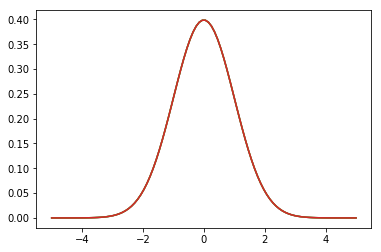

In [9]:
%matplotlib inline
%timeit plt.plot(domain, vg(domain))

I bravely built my own version of the Gaussian distribution, a continuous function (any real number input is OK, from negative infinity to infinity, but not those (keep it in between). The thing about a Gaussian is you can shrink it and grow it while keeping the curve itself, self similar.  Remember "hyperparamters"?  They control the shape.  We should be sure to play around with those parameters.

Of course the stats.norm section of scipy comes pre-equipped with the same PDF (probability distribution function).  You'll see this curve called many things in the literature.

The slowest run took 28.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.7 ms per loop


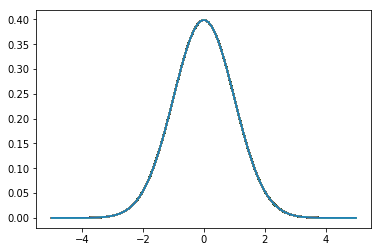

In [10]:
%timeit plt.plot(domain, st.norm.pdf(domain))

Text(0.5,1,'Gaussian Distributions')

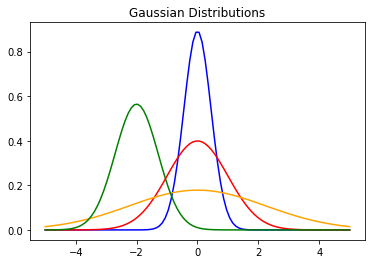

In [11]:
mu = 0
sigma = math.sqrt(0.2)
plt.plot(domain, vg(domain), color = 'blue')
sigma = math.sqrt(1)
plt.plot(domain, vg(domain), color = 'red')
sigma = math.sqrt(5)
plt.plot(domain, vg(domain), color = 'orange')
mu = -2
sigma = math.sqrt(.5)
plt.plot(domain, vg(domain), color = 'green')
plt.title("Gaussian Distributions")

[see Wikipedia figure](https://en.wikipedia.org/wiki/Gaussian_function#Properties)

These are Gaussian PDFs or Probability Density Functions.

68.26% of values happen within -1 and 1.

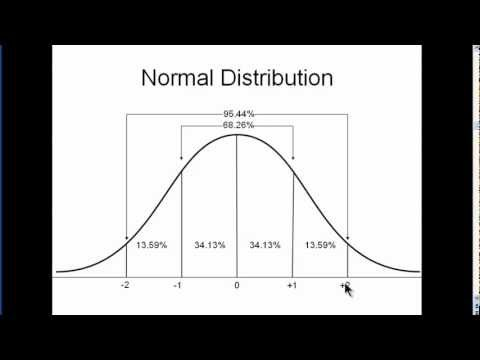

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo("xgQhefFOXrM")

In [13]:
a = st.norm.cdf(-1)  #  Cumulative distribution function
b = st.norm.cdf(1)
b - a

0.68268949213708585

In [14]:
a = st.norm.cdf(-2)
b = st.norm.cdf(2)
b - a

0.95449973610364158

In [15]:
# 99.73% is more correct than 99.72% 
a = st.norm.cdf(-3)
b = st.norm.cdf(3)
b - a

0.99730020393673979

In [16]:
# 95%
a = st.norm.cdf(-1.96)
b = st.norm.cdf(1.96)
b - a

0.95000420970355903

In [17]:
# 99% 
a = st.norm.cdf(-2.58)
b = st.norm.cdf(2.58)
b - a

0.9901199684844586

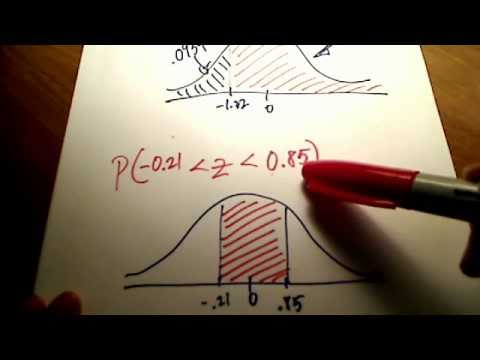

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo("zZWd56VlN7w")

What are the chances a value is less than -1.32?

In [19]:
st.norm.cdf(-1.32)

0.093417508993471787

What are the chances a value is between -0.21 and 0.85?

In [20]:
1 - st.norm.sf(-0.21) # filling in from the right (survival function)

0.41683383651755768

In [21]:
a = st.norm.cdf(0.85) # filling in from the left
a

0.80233745687730762

In [22]:
b = st.norm.cdf(-0.21) # from the left
b

0.41683383651755768

In [23]:
a-b # getting the difference (per the Youtube)

0.38550362035974994

Lets plot the integral of the Bell Curve.  This curve somewhat describes the temporal pattern whereby a new technology is adopted, first by early adopters, then comes the bandwagon effect, then come the stragglers.  Not the every technology gets adopted in this way.  Only some do.

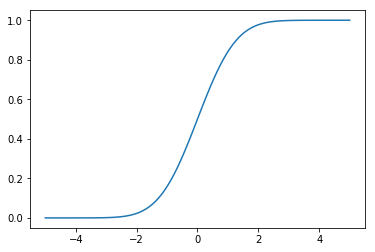

In [24]:
plt.plot(domain, st.norm.cdf(domain))

[Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation)

Above is the Bell Curve integral.

Remember the derivative is obtain from small differences: (f(x+h) - f(x))/x

Given x is our entire domain and operations are vectorized, it's easy enough to plot said derivative.

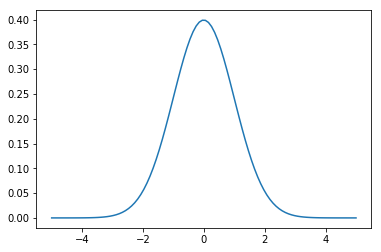

In [25]:
x = st.norm.cdf(domain)
diff = st.norm.cdf(domain + 0.01)
plt.plot(domain, (diff-x)/0.01)

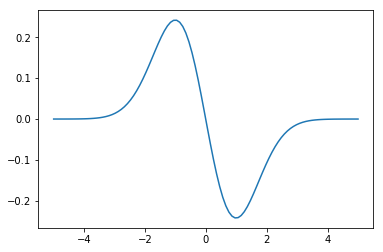

In [26]:
x = st.norm.pdf(domain)
diff = st.norm.pdf(domain + 0.01)
plt.plot(domain, (diff-x)/0.01)

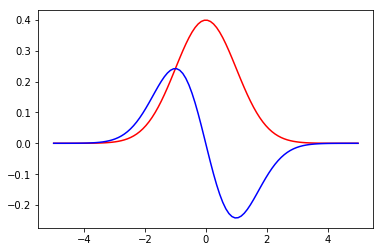

In [27]:
x = st.norm.pdf(domain)
plt.plot(domain, x, color = "red")

x = st.norm.pdf(domain)
diff = st.norm.pdf(domain + 0.01)
plt.plot(domain, (diff-x)/0.01, color = "blue")

# Integrating the Gaussian

Apparently there's no closed form, however sympy is able to do an integration somehow.

In [28]:
from sympy import var, Lambda, integrate, sqrt, pi, exp, latex

fig = plt.gcf()
fig.set_size_inches(8,5)
var('a b x sigma mu')
pdf = Lambda((x,mu,sigma),
  (1/(sigma * sqrt(2*pi)) * exp(-(mu-x)**2 / (2*sigma**2)))
)
cdf = Lambda((a,b,mu,sigma),
  integrate(
    pdf(x,mu,sigma),(x,a,b)
  )
)
display(Latex('$ cdf(a,b,\mu,\sigma) = ' + latex(cdf(a,b,mu,sigma)) + '$'))

<IPython.core.display.Latex object>

Lets stop right here and note the pdf and cdf have been defined, using sympy's Lambda and integrate, and the cdf will be fed a lot of data, one hundred points, along with mu and sigma.  Then it's simply a matter of plotting.

What's amazing is our ability to get something from sympy that works to give a cdf, independently of scipy.stats.norm.

<class 'function'>


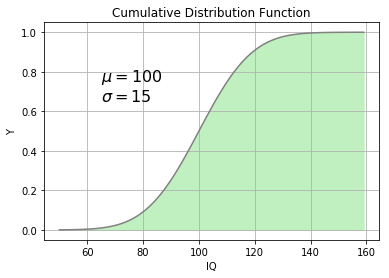

In [29]:
x = np.linspace(50,159,100)
y = np.array([cdf(-1e99,v,100,15) for v in x],dtype='float')
plt.grid(True)
plt.title('Cumulative Distribution Function')
plt.xlabel('IQ')
print(type(plt.xlabel))
plt.ylabel('Y')
plt.text(65,.75,'$\mu = 100$',fontsize=16)
plt.text(65,.65,'$\sigma = 15$',fontsize=16)
plt.plot(x,y,color='gray')
plt.fill_between(x,y,0,color='#c0f0c0')
plt.show()

The above is truly a testament to Python's power, or the Python ecosystem's power.  We've brought in sympy, able to do symbolic integration, and talk LaTeX at the same time.  That's impressive.  Here's [the high IQ source](https://arachnoid.com/IPython/normal_distribution.html) for the original version of the above code.

There's no indefinite integral of the Gaussian, but there's a definite one.  sympy comes with its own generic sympy.stats.cdf function which produces Lambdas (symbolic expressions) when used to integrate different types of probability spaces, such as Normal (a continuous PDF).  It also accepts discrete PMFs as well.

<pre>
Examples
========
    
>>> from sympy.stats import density, Die, Normal, cdf
>>> from sympy import Symbol
    
>>> D = Die('D', 6)
>>> X = Normal('X', 0, 1)
    
>>> density(D).dict
{1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}
>>> cdf(D)
{1: 1/6, 2: 1/3, 3: 1/2, 4: 2/3, 5: 5/6, 6: 1}
>>> cdf(3*D, D > 2)
{9: 1/4, 12: 1/2, 15: 3/4, 18: 1}
    
>>> cdf(X)
Lambda(_z, -erfc(sqrt(2)*_z/2)/2 + 1)
</pre>   

## LAB:  convert the Normal Distribution Below to IQ Curve...


That means domain is 0-200, standard deviation 15, mean = 100.

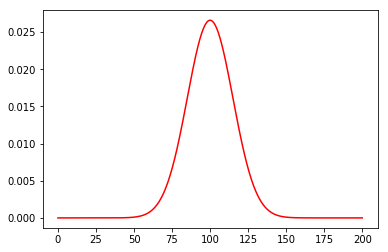

In [30]:
domain = np.linspace(0, 200, 3000)
IQ = st.norm.pdf(domain, 100, 15)
plt.plot(domain, IQ, color = "red")

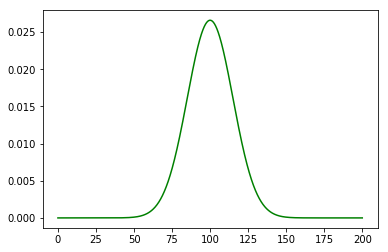

In [31]:
domain = np.linspace(0, 200, 3000)
mu = 100
sigma = 15
IQ = vg(domain)
plt.plot(domain, IQ, color = "green")